In [1]:
# Resolve paths from root project directory

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from data_tools import load_parsed_data

In [3]:
# Plot styles
import matplotlib.style as style
style.use('seaborn-poster')
style.use('ggplot')

In [4]:
# To-do: replace with import
#from data_tools import load_crawled_terms
def load_crawled_terms(filename):
  crawled_terms = []
  with open(filename) as r:
    for line in r:
      crawled_terms.append(line.replace("\n", ""))
  
  return crawled_terms

crawled_terms = load_crawled_terms("../keywords-3nov.txt")

In [63]:
cast_cols = {
    "tweet_count": "int32",
    "quote_count": "int32" 
}
for term in crawled_terms:
    cast_cols[term] = "Sparse[int8]"

tweet_df = load_parsed_data('../data/14-nov/parsed_tweets.json', exclude_cols={
    "tokens", 
    "cleaned_text", 
    "text", 
    "last_retweeted", 
    "place", 
    "processed",
    "media", 
    "isDeleted"
}, cast_cols=cast_cols, verbose=True)

tweet_df.info()

Loading 2696807 json lines
(4%): 100000 lines in ../data/14-nov/parsed_tweets.json processed (2.015958070755005 sec)
(7%): 200000 lines in ../data/14-nov/parsed_tweets.json processed (1.8895630836486816 sec)
(11%): 300000 lines in ../data/14-nov/parsed_tweets.json processed (1.8660948276519775 sec)
(15%): 400000 lines in ../data/14-nov/parsed_tweets.json processed (1.9215290546417236 sec)
(19%): 500000 lines in ../data/14-nov/parsed_tweets.json processed (13.036530017852783 sec)
(22%): 600000 lines in ../data/14-nov/parsed_tweets.json processed (2.464766025543213 sec)
(26%): 700000 lines in ../data/14-nov/parsed_tweets.json processed (2.3829147815704346 sec)
(30%): 800000 lines in ../data/14-nov/parsed_tweets.json processed (6.391815900802612 sec)
(33%): 900000 lines in ../data/14-nov/parsed_tweets.json processed (2.6524159908294678 sec)
(37%): 1000000 lines in ../data/14-nov/parsed_tweets.json processed (2.3923070430755615 sec)
(41%): 1100000 lines in ../data/14-nov/parsed_tweets.json

In [5]:
retweet_df = load_parsed_data('../data/14-nov/parsed_retweets.json')

retweet_df.info()

Loading 8044982 json lines
(1%): 100000 lines in ../data/14-nov/parsed_retweets.json processed (0.63962721824646 sec)
(2%): 200000 lines in ../data/14-nov/parsed_retweets.json processed (0.4738030433654785 sec)
(4%): 300000 lines in ../data/14-nov/parsed_retweets.json processed (0.4113140106201172 sec)
(5%): 400000 lines in ../data/14-nov/parsed_retweets.json processed (0.4935932159423828 sec)
(6%): 500000 lines in ../data/14-nov/parsed_retweets.json processed (0.38610410690307617 sec)
(7%): 600000 lines in ../data/14-nov/parsed_retweets.json processed (0.3552072048187256 sec)
(9%): 700000 lines in ../data/14-nov/parsed_retweets.json processed (0.383908748626709 sec)
(10%): 800000 lines in ../data/14-nov/parsed_retweets.json processed (0.34503602981567383 sec)
(11%): 900000 lines in ../data/14-nov/parsed_retweets.json processed (0.3759727478027344 sec)
(12%): 1000000 lines in ../data/14-nov/parsed_retweets.json processed (0.3509821891784668 sec)
(14%): 1100000 lines in ../data/14-nov/p

In [6]:
user_df = load_parsed_data('../data/14-nov/parsed_users.json', exclude_cols={"description"}, index_col="datastore_id")

user_df.info()

Loading 806800 json lines
(12%): 100000 lines in ../data/14-nov/parsed_users.json processed (1.0001180171966553 sec)
(25%): 200000 lines in ../data/14-nov/parsed_users.json processed (0.9897699356079102 sec)
(37%): 300000 lines in ../data/14-nov/parsed_users.json processed (0.9631030559539795 sec)
(50%): 400000 lines in ../data/14-nov/parsed_users.json processed (1.0178329944610596 sec)
(62%): 500000 lines in ../data/14-nov/parsed_users.json processed (1.008234977722168 sec)
(74%): 600000 lines in ../data/14-nov/parsed_users.json processed (1.0699131488800049 sec)
(87%): 700000 lines in ../data/14-nov/parsed_users.json processed (1.0220661163330078 sec)
(99%): 800000 lines in ../data/14-nov/parsed_users.json processed (0.997776985168457 sec)
Done loading ../data/14-nov/parsed_users.json
806800 lines in ../data/14-nov/parsed_users.json processed (8.139814853668213 sec)
<class 'pandas.core.frame.DataFrame'>
Index: 806800 entries, 1199502560928907265 to 147207892
Data columns (total 11 co

created_at                         2019-11-27T01:38:06Z
followed_cnts                                         0
friends_count                                       259
protected                                         False
url                http://www.twitch.tv/skreamnRedSkull
followers_count                                     187
name                             Rize | SkreamnRedSkull
handle                                  SkreamnR3dSkull
location                                 Minnesota, USA
verified                                          False
friends                                            None
Name: 1199502560928907265, dtype: object

In [9]:
recent_tweet_df = tweet_df[tweet_df.timestamp > '2020-10-23 00:00:00']

# 1) Basic stats

- \# of tweets
- \# of retweets
- \# of accounts
- Stream from when to when (using retweets)
- Volume per day

In [10]:
print("--Size--")
print("Number of tweets: {:,}".format(len(tweet_df.index)))
print("Number of tweets after October 23rd: {:,}".format(len(recent_tweet_df.index)))
print("Number of retweets: {:,}".format(len(retweet_df.index)))
print("Number of accounts: {:,}".format(len(user_df.index)))
print()
print("--Coverage--")
print("Earliest tweet: {}, last tweet: {}".format(tweet_df.timestamp.min(), tweet_df.timestamp.max()))
print("Earliest retweet: {}, last retweet: {}".format(retweet_df.timestamp.min(), retweet_df.timestamp.max()))

--Size--
Number of tweets: 2,696,807
Number of tweets after October 23rd: 2,693,133
Number of retweets: 8,044,982
Number of accounts: 806,800

--Coverage--
Earliest tweet: 2011-04-07T01:54:00Z, last tweet: 2020-11-14T23:49:20Z
Earliest retweet: 2020-10-23T16:59:58Z, last retweet: 2020-11-15T00:44:22Z


# 2) Retweet count by hour for our data


In [11]:
def group_df_by_hour(df, column='timestamp'):
    grouped_by_hour = (pd.to_datetime(df[column])
        .dt.floor('H')
        .value_counts()
        .rename_axis('date')
        .reset_index(name='count')).sort_values(by=['date'])
    return grouped_by_hour.set_index('date')

retweet_df_by_hour = group_df_by_hour(retweet_df)
len(retweet_df_by_hour.index)

517

In [12]:
retweet_df_by_hour[:10]

,count
date,
2020-10-23 16:00:00+00:00,1
2020-10-23 17:00:00+00:00,681
2020-10-23 18:00:00+00:00,1272
2020-10-23 19:00:00+00:00,561
2020-10-23 20:00:00+00:00,932
2020-10-23 21:00:00+00:00,847
2020-10-23 22:00:00+00:00,1160
2020-10-23 23:00:00+00:00,966
2020-10-24 00:00:00+00:00,597


In [13]:
rolling_average = retweet_df_by_hour.rolling('12h').mean()

rolling_average[:10]

,count
date,
2020-10-23 16:00:00+00:00,1.000000
2020-10-23 17:00:00+00:00,341.000000
2020-10-23 18:00:00+00:00,651.333333
2020-10-23 19:00:00+00:00,628.750000
2020-10-23 20:00:00+00:00,689.400000
2020-10-23 21:00:00+00:00,715.666667
2020-10-23 22:00:00+00:00,779.142857
2020-10-23 23:00:00+00:00,802.500000
2020-10-24 00:00:00+00:00,779.666667


Text(0.5, 1.0, 'Retweet Coverage (total=8,044,982)')

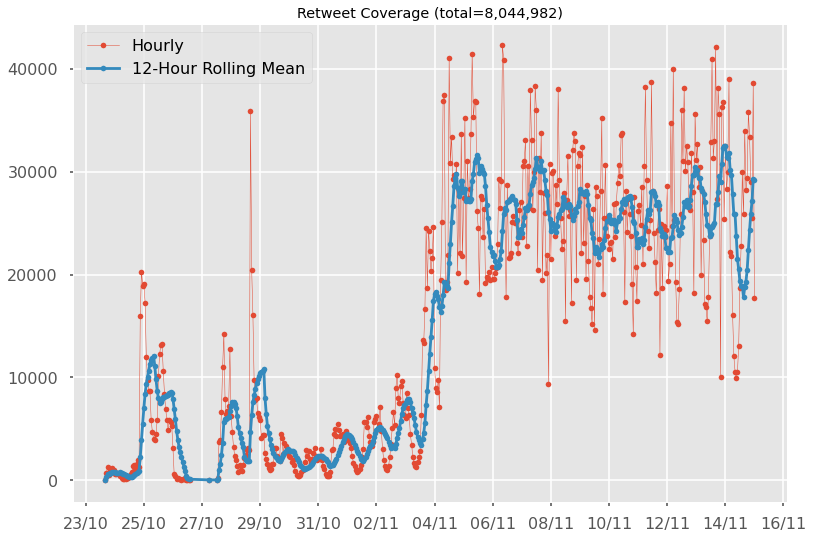

In [14]:
fig, ax = plt.subplots()   


ax.plot(retweet_df_by_hour["count"], label="Hourly", marker='.', linestyle='-', linewidth=0.5)
ax.plot(rolling_average["count"], marker='.', linestyle='-', label='12-Hour Rolling Mean')

ax.legend()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
# mdates.HourLocator(interval = 12)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 2))


ax.set_title('Retweet Coverage (total={:,})'.format(len(retweet_df.index)))

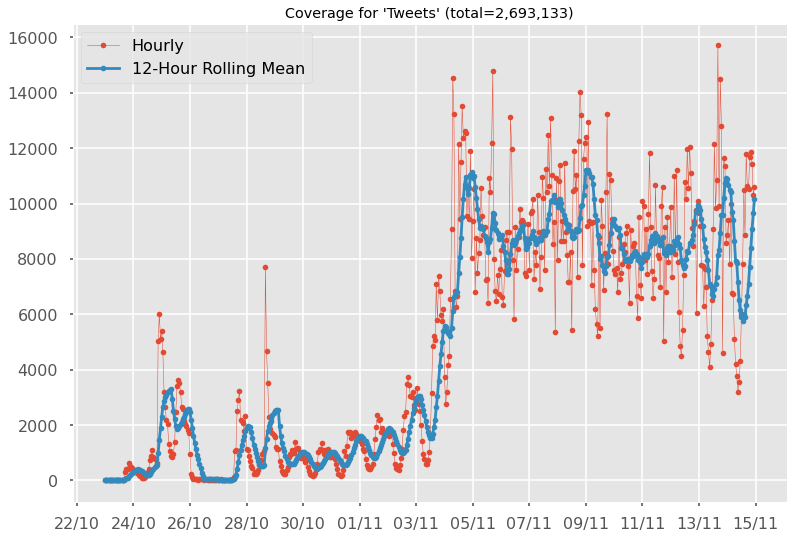

In [20]:
from interface.utils import plot_hourly_coverage

plot_hourly_coverage(recent_tweet_df, "Tweets")
None

# 3-6) Analyzing crawled terms among streamed tweets

In [17]:
crawled_terms

['#ballotfraud',
 '#ballotharvesting',
 '#ballotvoterfraud',
 '#cheatingdemocrats',
 '#democratvoterfraud',
 '#discardedballots',
 '#electionfraud',
 '#electioninterference',
 '#electiontampering',
 '#gopvoterfraud',
 '#hackedvotingmachines',
 '#ilhanomarballotharvesting',
 '#ilhanomarvoterfraud',
 '#mailinvoterfraud',
 '#nomailinvoting',
 '#stopgopvoterfraud',
 '#stopthesteal',
 '#stopvoterfraud',
 '#votebymailfraud',
 '#voterfraud',
 '#voterfraudisreal',
 'Destroyed ballots',
 'Discarded ballots',
 'Election fraud',
 'Election interference',
 'Election tampering',
 'Hacked voting machine',
 'Pre-filled ballot',
 'Stolen ballots',
 'ballot fraud',
 'ballot harvesting',
 'cheating democrats',
 'democrats cheat',
 'harvest ballot',
 'vote by mail fraud',
 'voter fraud']

In [84]:
# Prepare crawled terms dataframe

crawled_terms_stats = []

for term in crawled_terms:
    if term in tweet_df.columns:
        stats = {}
        stats["term"] = term
        stats["tweet count"] = tweet_df[term].value_counts().values[1]
        crawled_terms_stats.append(stats)

crawled_terms_df = pd.DataFrame(crawled_terms_stats).sort_values(by=['tweet count'], ascending=False)

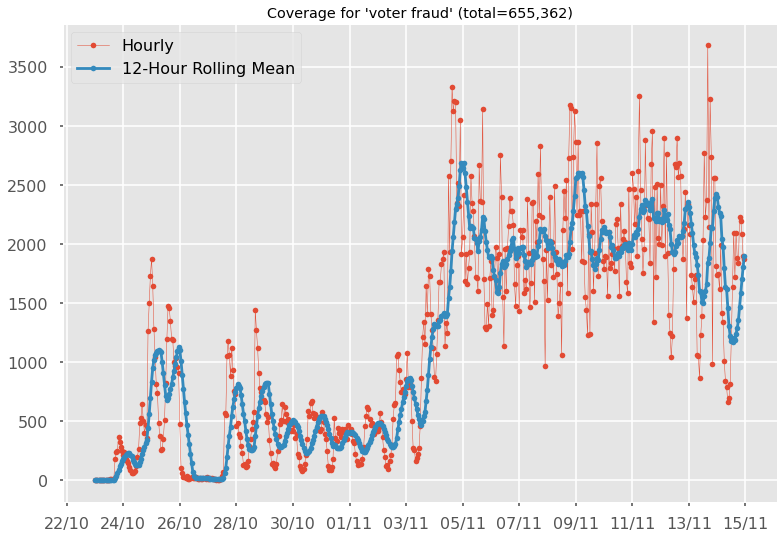

In [26]:

selected_crawled_term = "voter fraud"

filtered_by_crawled_term = recent_tweet_df[recent_tweet_df[selected_crawled_term] == 1]

plot_hourly_coverage(filtered_by_crawled_term, selected_crawled_term)
None

<AxesSubplot:>

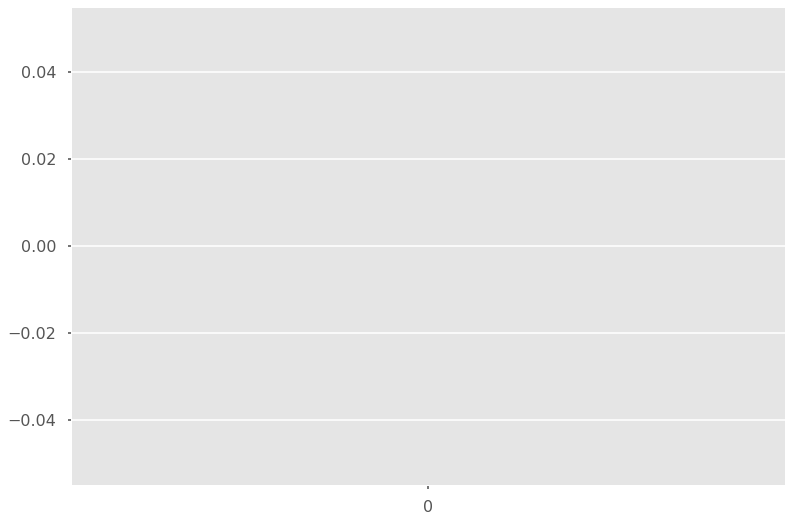

In [21]:
# Histogram by hour for each hashtag/phrases crawled (i.e. “crawled terms”). 

by_hour = group_df_by_hour(filtered_by_crawled_term)

sns.barplot()

# 5) Co-occurrence matrix

In [85]:
# Co-occ
threshold = 5000
terms_in_df = [row["term"] for i, row in crawled_terms_df.iterrows() if row["tweet count"] > threshold]
crawled_terms_tweet_df = tweet_df[terms_in_df].sparse.to_dense().astype("int32")
co_occurrence = crawled_terms_tweet_df.T.dot(crawled_terms_tweet_df)

co_occurrence

,voter fraud,#stopthesteal,Election fraud,#voterfraud,#electionfraud,Election interference,ballot harvesting,ballot fraud,#electioninterference,democrats cheat,#voterfraudisreal,#ballotharvesting,Election tampering,#cheatingdemocrats
voter fraud,656700,3176,5593,5306,860,1538,2411,538,194,515,402,252,530,123
#stopthesteal,3176,233686,1462,13920,7488,168,145,187,1331,108,753,527,62,803
Election fraud,5593,1462,217878,807,1176,393,369,294,91,124,45,62,126,63
#voterfraud,5306,13920,807,119975,7214,89,204,134,2044,96,8777,1929,16,968
#electionfraud,860,7488,1176,7214,48603,58,32,132,954,39,124,791,15,217
Election interference,1538,168,393,89,58,36650,55,33,199,5,16,6,34,9
ballot harvesting,2411,145,369,204,32,55,23808,110,3,53,19,82,22,2
ballot fraud,538,187,294,134,132,33,110,15370,7,12,6,15,22,0
#electioninterference,194,1331,91,2044,954,199,3,7,13744,2,49,202,7,126
democrats cheat,515,108,124,96,39,5,53,12,2,9088,3,3,3,16


In [86]:
co_occurrence_diagonal = np.diagonal(co_occurrence)

with np.errstate(divide='ignore', invalid='ignore'):
    co_occurrence_percentage = np.nan_to_num(np.true_divide(co_occurrence, co_occurrence_diagonal[:, None]))

pd.DataFrame(np.log(co_occurrence_percentage), index=co_occurrence.index, columns=co_occurrence.columns)

,voter fraud,#stopthesteal,Election fraud,#voterfraud,#electionfraud,Election interference,ballot harvesting,ballot fraud,#electioninterference,democrats cheat,#voterfraudisreal,#ballotharvesting,Election tampering,#cheatingdemocrats
voter fraud,0.000000,-5.331605,-4.765711,-4.818389,-6.638050,-6.056744,-5.607186,-7.107124,-8.127124,-7.150816,-7.398530,-7.865553,-7.122106,-8.582798
#stopthesteal,-4.298356,0.000000,-5.074173,-2.820652,-3.440677,-7.237770,-7.385000,-7.130625,-5.168048,-7.679602,-5.737668,-6.094533,-8.234599,-5.673379
Election fraud,-3.662419,-5.004130,0.000000,-5.598367,-5.221816,-6.317881,-6.380894,-6.608111,-7.780831,-7.471409,-8.485028,-8.164556,-7.455409,-8.148556
#voterfraud,-3.118445,-2.153957,-5.001715,0.000000,-2.811260,-7.206402,-6.376919,-6.797199,-4.072375,-7.130690,-2.615149,-4.130282,-8.922450,-4.819807
#electionfraud,-4.034508,-1.870384,-3.721566,-1.907662,0.000000,-6.730998,-7.325705,-5.908639,-3.930777,-7.127879,-5.971159,-4.118143,-8.083390,-5.411543
Election interference,-3.170931,-5.385205,-4.535359,-6.020532,-6.448726,0.000000,-6.501836,-7.012661,-5.215864,-8.899731,-7.736580,-8.717409,-6.982808,-8.311944
ballot harvesting,-2.289980,-5.101043,-4.166980,-4.759657,-6.612041,-6.070444,0.000000,-5.377297,-8.979165,-6.107485,-7.133338,-5.671058,-6.986734,-9.384630
ballot fraud,-3.352314,-4.409064,-3.956593,-4.742333,-4.757371,-6.143665,-4.939692,0.000000,-7.694263,-7.155266,-7.848413,-6.932123,-6.549130,-inf
#electioninterference,-4.260499,-2.334672,-5.017498,-1.905694,-2.667694,-4.235053,-8.429745,-7.582447,0.000000,-8.835210,-5.636537,-4.220090,-7.582447,-4.692076
democrats cheat,-2.870543,-4.432579,-4.294429,-4.550362,-5.451148,-7.505272,-5.144418,-6.629803,-8.421563,0.000000,-8.016098,-8.016098,-8.016098,-6.342121


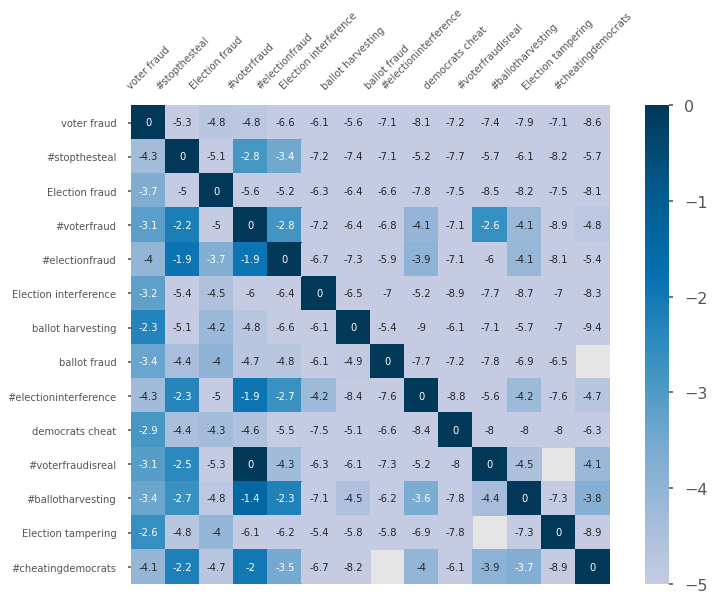

In [137]:
co_occurrence_df = pd.DataFrame(
    np.log(co_occurrence_percentage),
    index=co_occurrence.index,
    columns=co_occurrence.columns,
)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

sns.heatmap(
    co_occurrence_df,
    cbar=True,
    square=True,
    annot=True,
    vmin=-5,
    vmax=0,
    center=-2,
    cmap="PuBu",
    linecolor="black",
)
plt.xticks(rotation=45)
None

### 6) 10 most retweeted/quoted tweets for each crawled term

In [127]:

    
term = crawled_terms_df.iloc[0]["term"]
term_stats = tweet_df[tweet_df[term] == 1][["retweet_count", "quote_count"]].fillna(0).astype(int)
top_retweeted = term_stats.nlargest(10, 'retweet_count').sort_values('retweet_count', ascending=False)
top_quoted = term_stats.nlargest(10, 'quote_count').sort_values('quote_count', ascending=False)

,retweet_count,quote_count
1299856,206773,8230
851311,77173,13622
2138876,65974,5309
150157,61833,8813
2139045,58350,2690
49153,51350,1720
2138241,41017,9609
2138639,40763,2338
146585,40425,4421
2138770,38645,7737


In [133]:
import json

def lookup_parsed_tweet_data(indices):
    counter = 0
    data = []
    with open('../data/14-nov/parsed_tweets.json') as r:
        for line in r:
            if counter in indices:
                data.append(json.loads(line))
                if (len(data) == len(indices)):
                    break
            counter += 1
    return data
print()
print("--TOP RETWEETED TWEETS--")
print()
for i, tweet in enumerate(lookup_parsed_tweet_data(top_retweeted.index.values)):
    print("{}) {}".format(i+1, tweet["text"]))
    print("Quotes: {}".format(tweet["quote_count"]))
    print("Retweets: {}".format(tweet["retweet_count"]))
    print()

print()
print("--TOP QUOTED TWEETS--")
print()
for i, tweet in enumerate(lookup_parsed_tweet_data(top_quoted.index.values)):
    print("{}) {}".format(i+1, tweet["text"]))
    print("Quotes: {}".format(tweet["quote_count"]))
    print("Retweets: {}".format(tweet["retweet_count"]))
    print()




--TOP RETWEETED TWEETS--

1) Trump supporters will believe there’s voter fraud with 0 evidence, but can’t believe he sexually assaulted any women with 26 allegations.
Quotes: 1720
Retweets: 51350

2) There’s infinitely more evidence of voter fraud than there ever was of  “Russia Collusion” but strangely no one in the media wants to look into it.
Quotes: 4421
Retweets: 40425

3) When America sees everything we are uncovering they will be disgusted and even the media won’t be able to pretend voter fraud isn’t real. 

Ending this crap once and for all will be fundamental to preserving our republic and faith in democracy.
Quotes: 8813
Retweets: 61833

4) “We should look at the votes. We’re just beginning the tabulation stage. We should look at these allegations. We’re seeing a number of affidavits that there has been voter fraud. We have a history in this country of election problems. In Pennsylvania you had an order by a...
Quotes: 13622
Retweets: 77173

5) It’s wild Trump supporters bel

### 7) Top 10 prominent accounts for each crawled term (in terms of followers)

# Export Retweet graph


In [60]:
import networkx as nx

retweet_graph = nx.DiGraph()

filename = "graph.gml"

def add_node_to_graph(graph, user_id):
    graph.add_node(
        user_id,
        label=user_df.at[user_id, "handle"],
        followers=user_df.at[user_id, "followers_count"]
    )

known = 0
unknown = 0
for i, retweet in retweet_df.iterrows():
    retweet_author = retweet["retweetedFrom_user"]
    retweet_user = retweet["user"]
    if retweet_author in retweet_graph:
        if retweet_author in user_df.index:
            add_node_to_graph(retweet_graph, retweet_author)
            known += 1
        else:
            unknown += 1
    if retweet_user in retweet_graph:
        if retweet_user in user_df.index:
            add_node_to_graph(retweet_graph, retweet_user)
            known += 1
        else:
            unknown += 1

    retweet_graph.add_edge(retweet_user, retweet_author)

print("{} known users".format(known))
print("{} unknown users".format(unknown))
print("Done adding edges, exporting...")
#nx.write_edgelist(retweet_graph, '../data/graph.csv')
nx.write_gexf(retweet_graph, '../data/graph.gexf')
print("Exported to {}".format(filename))



12319467 known users
2446499 unknown users
Done adding edges, exporting...
Exported to graph.gml


In [132]:
tweet_df[5:10].index.values

array([5, 6, 7, 8, 9])